In [1]:
import os
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sentencepiece as spm
from tqdm.notebook import tqdm
from wordcloud import WordCloud

random_seed = 1234
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

---

**Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ**

In [2]:
## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

data_dir = os.getenv("HOME") + "/aiffel/bert_qna/data"
model_dir = os.getenv("HOME") + "/aiffel/bert_qna/models"

train_file = data_dir + "/KorQuAD_v1.0_train.json"
dev_file = data_dir + "/KorQuAD_v1.0_dev.json"

In [3]:
## Îç∞Ïù¥ÌÑ∞ Ï∂úÎ†•

def print_json(data, indent = "-"):
    for key, value in data.items():
        if type(value) == list: 
            print(f"{indent} {key} : list[{len(value)}]")
            print_json(value[0], indent + "-")
        else: 
            print(f"{indent} {key} : {value}")

In [4]:
## train ÎØ∏Î¶¨Î≥¥Í∏∞

with open(train_file) as f:
    train = json.load(f)
    print_json(train)

- version : KorQuAD_v1.0_train
- data : list[1420]
-- paragraphs : list[3]
--- qas : list[8]
---- answers : list[1]
----- text : ÍµêÌñ•Í≥°
----- answer_start : 54
---- id : 6566495-0-0
---- question : Î∞îÍ∑∏ÎÑàÎäî Í¥¥ÌÖåÏùò ÌååÏö∞Ïä§Ìä∏Î•º ÏùΩÍ≥† Î¨¥ÏóáÏùÑ Ïì∞Í≥†Ïûê ÌñàÎäîÍ∞Ä?
--- context : 1839ÎÖÑ Î∞îÍ∑∏ÎÑàÎäî Í¥¥ÌÖåÏùò ÌååÏö∞Ïä§Ìä∏ÏùÑ Ï≤òÏùå ÏùΩÍ≥† Í∑∏ ÎÇ¥Ïö©Ïóê ÎßàÏùåÏù¥ ÎÅåÎ†§ Ïù¥Î•º ÏÜåÏû¨Î°ú Ìï¥ÏÑú ÌïòÎÇòÏùò ÍµêÌñ•Í≥°ÏùÑ Ïì∞Î†§Îäî ÎúªÏùÑ Í∞ñÎäîÎã§. Ïù¥ ÏãúÍ∏∞ Î∞îÍ∑∏ÎÑàÎäî 1838ÎÖÑÏóê Îπõ ÎèÖÏ¥âÏúºÎ°ú ÏÇ∞Ï†ÑÏàòÏ†ÑÏùÑ Îã§ Í±≤ÏùÄ ÏÉÅÌô©Ïù¥Îùº Ï¢åÏ†àÍ≥º Ïã§ÎßùÏóê Í∞ÄÎìùÌñàÏúºÎ©∞ Î©îÌîºÏä§ÌÜ†Ìé†Î†àÏä§Î•º ÎßåÎÇòÎäî ÌååÏö∞Ïä§Ìä∏Ïùò Ïã¨Í≤ΩÏóê Í≥µÍ∞êÌñàÎã§Í≥† ÌïúÎã§. ÎòêÌïú ÌååÎ¶¨ÏóêÏÑú ÏïÑÎ∏åÎÑ§ÌÅ¨Ïùò ÏßÄÌúòÎ°ú ÌååÎ¶¨ ÏùåÏïÖÏõê Í¥ÄÌòÑÏïÖÎã®Ïù¥ Ïó∞Ï£ºÌïòÎäî Î≤†ÌÜ†Î≤§Ïùò ÍµêÌñ•Í≥° 9Î≤àÏùÑ Îì£Í≥† ÍπäÏùÄ Í∞êÎ™ÖÏùÑ Î∞õÏïòÎäîÎç∞, Ïù¥Í≤ÉÏù¥ Ïù¥Îì¨Ìï¥ 1ÏõîÏóê ÌååÏö∞Ïä§Ìä∏Ïùò ÏÑúÍ≥°ÏúºÎ°ú Ïì∞Ïó¨ÏßÑ Ïù¥ ÏûëÌíàÏóê Ï°∞Í∏àÏù¥ÎùºÎèÑ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§ÏúºÎ¶¨ÎùºÎäî Í≤ÉÏùÄ ÏùòÏã¨Ìï† Ïó¨ÏßÄÍ∞Ä ÏóÜÎã§. Ïó¨Í∏∞

In [5]:
## dev ÎØ∏Î¶¨Î≥¥Í∏∞

with open(dev_file) as f:
    dev = json.load(f)
    print_json(dev)

- version : KorQuAD_v1.0_dev
- data : list[140]
-- paragraphs : list[2]
--- qas : list[7]
---- answers : list[1]
----- text : 1989ÎÖÑ 2Ïõî 15Ïùº
----- answer_start : 0
---- id : 6548850-0-0
---- question : ÏûÑÏ¢ÖÏÑùÏù¥ Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùòÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ Îêú ÎÇ†ÏùÄ?
--- context : 1989ÎÖÑ 2Ïõî 15Ïùº Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùò(Ìè≠Î†•ÌñâÏúÑÎì±Ï≤òÎ≤åÏóêÍ¥ÄÌïúÎ≤ïÎ•†ÏúÑÎ∞ò)ÏúºÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ÎêòÏóàÎã§. 1989ÎÖÑ 3Ïõî 12Ïùº ÏÑúÏö∏ÏßÄÎ∞©Í≤ÄÏ∞∞Ï≤≠ Í≥µÏïàÎ∂ÄÎäî ÏûÑÏ¢ÖÏÑùÏùò ÏÇ¨Ï†ÑÍµ¨ÏÜçÏòÅÏû•ÏùÑ Î∞úÎ∂ÄÎ∞õÏïòÎã§. Í∞ôÏùÄ Ìï¥ 6Ïõî 30Ïùº ÌèâÏñëÏ∂ïÏ†ÑÏóê ÏûÑÏàòÍ≤ΩÏùÑ ÎåÄÌëúÎ°ú ÌååÍ≤¨ÌïòÏó¨ Íµ≠Í∞ÄÎ≥¥ÏïàÎ≤ïÏúÑÎ∞ò ÌòêÏùòÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÎã§. Í≤ΩÏ∞∞ÏùÄ 12Ïõî 18Ïùº~20Ïùº ÏÇ¨Ïù¥ ÏÑúÏö∏ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóêÏÑú ÏûÑÏ¢ÖÏÑùÏù¥ ÏÑ±Î™Ö Î∞úÌëúÎ•º Ï∂îÏßÑÌïòÍ≥† ÏûàÎã§Îäî Ï≤©Î≥¥Î•º ÏûÖÏàòÌñàÍ≥†, 12Ïõî 18Ïùº Ïò§Ï†Ñ 7Ïãú 40Î∂Ñ Í≤Ω Í∞ÄÏä§Ï¥ùÍ≥º Ï†ÑÏûêÎ¥âÏúºÎ°ú Î¨¥Ïû•Ìïú ÌäπÍ≥µÏ°∞ Î∞è ÎåÄÍ≥µÍ≥º ÏßÅÏõê 12Î™Ö Îì± 22Î™ÖÏùò ÏÇ¨Î≥µ Í≤ΩÏ∞∞ÏùÑ ÏäπÏö©Ï∞® 8ÎåÄÏóê ÎÇòÎàÑÏñ¥ Í≤ΩÌù¨Î

In [6]:
## vocab Î°úÎìú

vocab = spm.SentencePieceProcessor()
vocab.load(model_dir + "/ko_32000.model")

True

In [7]:
## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

def tokenize_space(string):
    '''
    Î¨∏ÏûêÏó¥(arg)ÏùÑ Í≥µÎ∞±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÎäî Ìï®Ïàò
    
    Returns:
        words(list): Î∂ÑÎ¶¨Îêú ÏöîÏÜå(Îã®Ïñ¥)
        nspace(list): Í∏ÄÏûê(char) Îã®ÏúÑ ÏúÑÏπò Ï†ïÎ≥¥(Ïù¥Ï†Ñ Í≥µÎ∞± Í∞úÏàò)
    '''
    words = []
    nspace = []
    
    prev_space = True
    for char in string:
        if  char == " " or char == "\t" or char == "\r" or char == "\n" or ord(char) == 0x202F:
            prev_space = True
        else:
            if prev_space:
                words.append(char)
            else:
                words[-1] += char
            prev_space = False

        nspace.append(len(words) - 1)

    return words, nspace


def tokenize_subword(vocab, words):
    '''
    subwordÎ•º Î∂ÑÎ¶¨ÌïòÎäî Ìï®Ïàò
    
    Returns:
        subwords(list): Î∂ÑÎ¶¨Îêú ÏöîÏÜå(Îã®Ïñ¥)
        nsubwords(list): subwordsÏùò ÏúÑÏπò Ï†ïÎ≥¥
    '''
    subwords = []
    nsubwords = []
    
    for word in words:
        nsubwords.append(len(subwords))
        subword = vocab.encode_as_pieces(word)
        for s in subword:
            subwords.append(s)
    
    return subwords, nsubwords

In [8]:
## ÏòàÏãú

string = '1839ÎÖÑ ÌååÏö∞Ïä§Ìä∏Î•º ÏùΩÏóàÎã§.'
words, nspace = tokenize_space(string)
subwords, nsubwords = tokenize_subword(vocab, words)

print('tokenize_space >', words, nspace)
print('tokenize_subword >', subwords, nsubwords)

tokenize_space > ['1839ÎÖÑ', 'ÌååÏö∞Ïä§Ìä∏Î•º', 'ÏùΩÏóàÎã§.'] [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
tokenize_subword > ['‚ñÅ1839', 'ÎÖÑ', '‚ñÅ', 'ÌååÏö∞Ïä§Ìä∏', 'Î•º', '‚ñÅÏùΩ', 'ÏóàÎã§', '.'] [0, 2, 5]


In [9]:
## Ï†ïÎãµ ÌÉêÏÉâ

def answer_start_end(vocab, subwords, start, end, answer):
    '''
    Ï†ïÎãµÏùò ÏúÑÏπò Ï†ïÎ≥¥Î•º Î∞òÌôòÌïòÎäî Ìï®Ïàò
    
    Args:
        subwords(list): context subwords
        start: contextÏóêÏÑú Ï†ïÎãµÏùò ÏãúÏûë ÏúÑÏπò
        end: contextÏóêÏÑú Ï†ïÎãµÏùò ÎÅù ÏúÑÏπò
        answer(str): Ï†ïÎãµ 
    '''
    answer = " ".join(vocab.encode_as_pieces(answer))
    for s in range(start, end + 1):
        for e in range(end, s - 1, -1):
            text = " ".join(subwords[s : e + 1])
            if text == answer:
                return (s, e)
    
    return (start, end)

In [10]:
## Îç∞Ïù¥ÌÑ∞ÏÖã

def dumps_data(vocab, data, file):
    '''
    Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏ†úÌïòÍ≥† ÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
    
    Args:
        data: Î°úÎìúÌïú json Îç∞Ïù¥ÌÑ∞
        file: ÌååÏùºÏùÑ Ï†ÄÏû•Ìï† Í≤ΩÎ°ú
    '''
    with open(file, "w") as f:
        for d in tqdm(data["data"]):
            title = d["title"]
            for paragraph in d["paragraphs"]:
                # context
                context = paragraph["context"]
                context_words, context_nspace = tokenize_space(context) # Í≥µÎ∞± Ï≤òÎ¶¨
                
                for qa in paragraph["qas"]:
                    # question
                    qa_id = qa["id"]
                    question = qa["question"]
                    
                    # answer
                    assert len(qa["answers"]) == 1
                    
                    answer = qa["answers"][0]["text"]
                    answer_start = qa["answers"][0]["answer_start"]
                    answer_end = answer_start + len(answer) - 1
                    
                    assert answer == context[answer_start:answer_end + 1]
                    
                    answer_start = context_nspace[answer_start]
                    answer_end = context_nspace[answer_end]
                    
                    answer = " ".join(answer.strip().split())
                    answer_in_context = " ".join(context_words[answer_start:answer_end + 1])
                    
                    assert answer in answer_in_context
                    
                    context_subwords, context_nsubwords = tokenize_subword(vocab, context_words) # subword Ï≤òÎ¶¨
                    
                    answer_start = context_nsubwords[answer_start]
                    if answer_end < len(context_nsubwords) - 1:
                        answer_end = context_nsubwords[answer_end + 1] - 1
                    else:
                        answer_end = len(context_subwords) - 1
                    
                    answer_start, answer_end = answer_start_end(vocab, context_subwords, answer_start, answer_end, answer)
                    
                    # write
                    data = {"id" : qa_id, "title" : title, "question" : vocab.encode_as_pieces(question), 
                            "context" : context_subwords, "answer" : answer, "start" : answer_start, "end" : answer_end}
                    f.write(json.dumps(data, ensure_ascii = False))
                    f.write("\n")

In [11]:
dumps_data(vocab, train, f"{data_dir}/korquad_train.json")
dumps_data(vocab, dev, f"{data_dir}/korquad_dev.json")

  0%|          | 0/1420 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

---

**Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ**

In [12]:
## Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

questions = []
contexts = []
answers_start = []

with open(f"{data_dir}/korquad_train.json") as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        questions.append(data["question"])
        contexts.append(data["context"])
        answers_start.append(data["start"])

In [13]:
## question Í∏∏Ïù¥ Ï†ÄÏû•

train_question_length = [len(question) for question in questions]

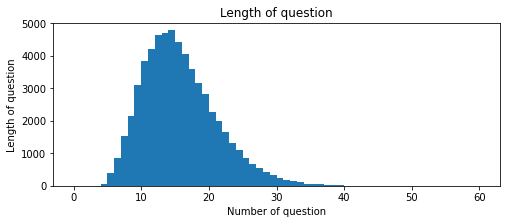

In [14]:
## question Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî

plt.figure(figsize = (8, 3))
plt.hist(train_question_length, bins = 60, range = [0, 60])
plt.title("Length of question")
plt.xlabel("Number of question")
plt.ylabel("Length of question")
plt.show()

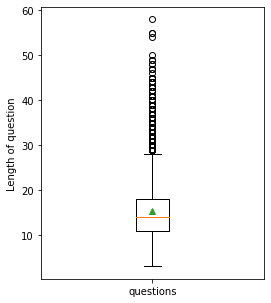

In [15]:
## question Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî

plt.figure(figsize = (4, 5))
plt.boxplot(train_question_length, labels = ["questions"], showmeans=True)
plt.ylabel("Length of question")
plt.show()

In [16]:
## question Í∏∏Ïù¥ ÏàòÏπò

pd.DataFrame(train_question_length).describe().T.style.hide_index()

* ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†àÎ∞òÏùò question Í∏∏Ïù¥Í∞Ä 10~18Ïù¥Î©∞, ÎåÄÎ∂ÄÎ∂Ñ 40 Ïù¥ÎÇ¥ÏûÖÎãàÎã§. 

In [17]:
## context Í∏∏Ïù¥ Ï†ÄÏû•

train_context_length = [len(context) for context in contexts]

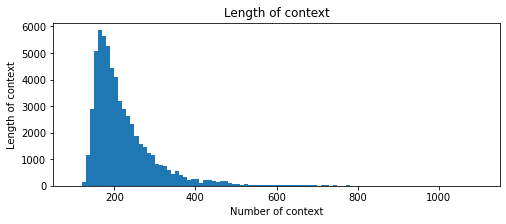

In [18]:
## context Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî

plt.figure(figsize = (8, 3))
plt.hist(train_context_length, bins = 100, range = [100, 1100])
plt.title("Length of context")
plt.xlabel("Number of context")
plt.ylabel("Length of context")
plt.show()

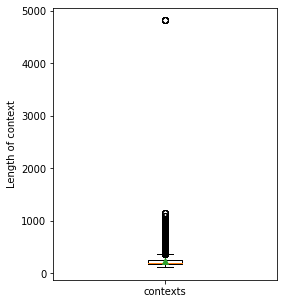

In [19]:
## context Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî

plt.figure(figsize = (4, 5))
plt.boxplot(train_context_length, labels = ["contexts"], showmeans=True)
plt.ylabel("Length of context")
plt.show()

In [20]:
## context Í∏∏Ïù¥ ÏàòÏπò

pd.DataFrame(train_context_length).describe().T.style.hide_index()

* ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†àÎ∞òÏùò question Í∏∏Ïù¥Í∞Ä 170~250Ïù¥Î©∞, ÎåÄÎ∂ÄÎ∂Ñ 800 Ïù¥ÎÇ¥Ïù¥ÏßÄÎßå Í∞ÑÌòπ ÏïÑÏ£º Í∏¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏñ¥ Î∂ÑÏÇ∞Ïù¥ Îß§Ïö∞ ÌÅΩÎãàÎã§. 

In [21]:
## Îç∞Ïù¥ÌÑ∞ Î™®ÏïÑÎ≥¥Í∏∞

documents = []

for data in tqdm(train["data"]):
    # document = title + context + question
    
    title = data["title"]
    documents.append(title) # document += title
    for paragraph in data["paragraphs"]:
        context = paragraph["context"]
        documents.append(context) # document += context
        for qa in paragraph["qas"]:
            assert len(qa["answers"]) == 1
            question = qa["question"]
            documents.append(question) # document += question

  0%|          | 0/1420 [00:00<?, ?it/s]

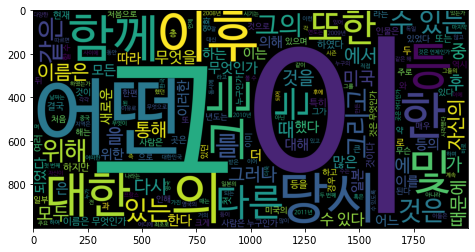

In [22]:
## ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

font = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wordcloud = WordCloud(width = 2000, height = 1000, font_path = font).generate(" ".join(documents))
plt.figure(figsize = (8, 4))
plt.imshow(wordcloud)

---

**Îç∞Ïù¥ÌÑ∞ Î°úÎìú**

In [12]:
train = os.path.join(data_dir, "korquad_train.json")
dev = os.path.join(data_dir, "korquad_dev.json")

In [13]:
## Îß§Í∞úÎ≥ÄÏàò(param) ÏÑ§Ï†ï

class Config(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__


max_len = Config({"max_sequence_length" : 384, "max_query_length" : 64})

In [14]:
## Îç∞Ïù¥ÌÑ∞ Î°úÎìú

def load_data(max_len, file):
    '''
    ÌååÏùºÏùÑ Î°úÎî©ÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏ†àÌûà Íµ¨Ï∂ïÌïòÎäî Ìï®Ïàò
    
    Returns:
        x:
            x(np.array): questionÍ≥º context Ìï©Ïùò ID
            segments(np.array): questionÏùò Í∏∏Ïù¥ÎßåÌÅº 0ÏùÑ, contextÏùò Í∏∏Ïù¥ÎßåÌÅº 1ÏùÑ Í∞ñÎäî Î¶¨Ïä§Ìä∏
        y:
            y_start(np.array): questionÍ≥º contextÏùò Ìï©ÏóêÏÑú Ï†ïÎãµÏùò ÏãúÏûë ÏúÑÏπò
            y_end(np.array): questionÍ≥º contextÏùò Ìï©ÏóêÏÑú Ï†ïÎãµÏùò ÎÅù ÏúÑÏπò
    '''
    x, segments, y_start, y_end = [], [], [], []
    
    nexcept = 0
    with open(file, "r") as f:
        for i, line in enumerate(tqdm(f, desc = "Loading")):
            data = json.loads(line) # loads file
            question = data["question"][:max_len.max_query_length] # question
            context = data["context"] # context
            start = data.get("start") # answer start
            end = data.get("end") # answer end
            answer = " ".join(context[start:end + 1]) # answer
            
            
            # ÏµúÎåÄ Í∏∏Ïù¥ Ï†úÌïú
            context_length = max_len.max_sequence_length - len(question) - 3
            if context_length <= end:
                nexcept += 1
                continue
            
            context = context[:context_length]
            
            assert len(question) + len(context) <= max_len.max_sequence_length - 3
            
            tokens = ['[CLS]'] + question + ['[SEP]'] + context + ['[SEP]'] # questionÍ≥º contextÏùò Ìï©
            
            # x
            ids = [vocab.piece_to_id(token) for token in tokens]
            ids += [0] * (max_len.max_sequence_length - len(ids))
            x.append(ids)
            
            # segments
            segs = [0] * (len(question) + 2) + [1] * (len(context) + 1)
            segs += [0] * (max_len.max_sequence_length - len(segs))
            segments.append(segs)
            
            # y
            start += (len(question) + 2)
            y_start.append(start)
            end += (len(question) + 2)
            y_end.append(end)
    
    print(f"exclude {nexcept} datas")
    
    return (np.array(x), np.array(segments)), (np.array(y_start), np.array(y_end))

In [15]:
# train data load
train_x, train_y = load_data(max_len, train)
print("{:<8} :".format("train"), train_x[0].shape)
print("{:<8} :".format("segments"), train_x[1].shape)
print("{:<8} :".format("start"), train_y[0].shape)
print("{:<8} :".format("end"), train_y[1].shape)

print()

# dev data load
dev_x, dev_y = load_data(max_len, dev)
print("{:<8} :".format("dev"), dev_x[0].shape)
print("{:<8} :".format("segments"), dev_x[1].shape)
print("{:<8} :".format("start"), dev_y[0].shape)
print("{:<8} :".format("end"), dev_y[1].shape)

Loading: 0it [00:00, ?it/s]

exclude 430 datas
train    : (59977, 384)
segments : (59977, 384)
start    : (59977,)
end      : (59977,)



Loading: 0it [00:00, ?it/s]

exclude 78 datas
dev      : (5696, 384)
segments : (5696, 384)
start    : (5696,)
end      : (5696,)


---

**Î™®Îç∏ÎßÅ**

In [16]:
def mask_pad(tokens, pad_id = 0):
    mask = tf.cast(tf.math.equal(tokens, pad_id), tf.float32)
    mask = tf.expand_dims(mask, axis = 1)
    return mask

def mask(tokens, pad_id = 0):
    # look ahead
    ahead_mask = 1 - tf.linalg.band_part(tf.ones((tf.shape(tokens)[1], tf.shape(tokens)[1])), -1, 0)
    ahead_mask = tf.expand_dims(ahead_mask, axis = 0)
    
    pad_mask = mask_pad(tokens, pad_id) # padding
    
    mask = tf.maximum(ahead_mask, pad_id)
    return mask


class Config(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    
    @classmethod
    def load(cls, file):
        with open(file, 'r') as f:
            config = json.loads(f.read())
            return Config(config)


# mode == "embedding" layer
class SharedEmbedding(tf.keras.layers.Layer):
    def __init__(self, config, name = "weigth_shared_embedding"):
        super().__init__(name = name)
        
        self.n_vocab = config.n_vocab
        self.d_model = config.d_model
        
    # shared weight ÏÉùÏÑ±
    def build(self, input_shape):
        with tf.name_scope("weigth_shared_embedding"):
            self.weight_shared = self.add_weight("weights", shape = [self.n_vocab, self.d_model], 
                                                 initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02))
    
    def call(self, inputs, mode = "embedding"):
        if mode == "embedding":
            return self._embedding(inputs)
        elif mode == "linear":
            return self._linear(inputs)
        else:
            raise ValueError(f"mode {mode} is not valid")
    
    def _embedding(self, inputs):
        return tf.gather(self.weight_shared, tf.cast(inputs, tf.int32))
    
    def _linear(self, inputs):
        inputs = tf.reshape(inputs, [-1, self.d_model])
        outputs = tf.matmul(inputs, self.weight_shared, transpose_b = True)
        outputs = tf.reshape(outputs, [tf.shape(inputs)[0], tf.shape(inputs)[1], self.n_vocab])
        return outputs
    
    
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, config, name = "positional_embedding"):
        super().__init__(name = name)
        self.embedding = tf.keras.layers.Embedding(config.n_seq, config.d_model,
                                                   embeddings_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02))
        
    def call(self, inputs):
        position = tf.cast(tf.math.cumsum(tf.ones_like(inputs), axis = 1, exclusive = True), tf.int32)
        return self.embedding(position)

    
class ScaleDotProductAttention(tf.keras.layers.Layer):
    def __init__(self, name = "scale_dot_product_attention"):
        super().__init__(name = name)
    
    def call(self, Q, K, V, mask):
        score = tf.matmul(Q, K, transpose_b = True)
        scale = tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        scale = tf.math.divide(score, scale)
        scale -= 1e+9 * mask
        scale = tf.nn.softmax(scale, axis = -1)
        return tf.matmul(scale, V)
    
    
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, config, name = "multi_head_attention"):
        super().__init__(name = name)
        
        self.d_model = config.d_model
        self.n_head = config.n_head
        self.d_head = config.d_head
        
        self.attention = ScaleDotProductAttention(name = "self_attention")
        
        # input dense layers
        self.WQ = tf.keras.layers.Dense(config.n_head * config.d_head,
                                        kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02),
                                        bias_initializer = tf.zeros_initializer)
        self.WK = tf.keras.layers.Dense(config.n_head * config.d_head,
                                        kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02),
                                        bias_initializer = tf.zeros_initializer)
        self.WV = tf.keras.layers.Dense(config.n_head * config.d_head,
                                        kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02),
                                        bias_initializer = tf.zeros_initializer)
        
        # output dense layer
        self.WO = tf.keras.layers.Dense(config.d_model,
                                        kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02),
                                        bias_initializer = tf.zeros_initializer)
        
    def call(self, Q, K, V, mask):
        # reshape Q, K, V
        Qm = tf.transpose(tf.reshape(self.WQ(Q), [tf.shape(Q)[0], -1, self.n_head, self.d_head]), [0, 2, 1, 3])
        Km = tf.transpose(tf.reshape(self.WK(K), [tf.shape(Q)[0], -1, self.n_head, self.d_head]), [0, 2, 1, 3])
        Vm = tf.transpose(tf.reshape(self.WV(V), [tf.shape(Q)[0], -1, self.n_head, self.d_head]), [0, 2, 1, 3])
        
        mask = tf.expand_dims(mask, axis = 1)
        
        outputs = self.attention(Qm, Km, Vm, mask)
        outputs = tf.reshape(tf.transpose(outputs, perm = [0, 2, 1, 3]), 
                             [tf.shape(Q)[0], -1, config.n_head * config.d_head])
        outputs = self.WO(outputs)
        return outputs
    

class PositionWiseFeedForward(tf.keras.layers.Layer):
    def __init__(self, config, name = "position_wise_feed_forward"):
        super().__init__(name)
        
        self.W_1 = tf.keras.layers.Dense(config.d_ff, 
                                         activation = tf.keras.activations.gelu,
                                         kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02),
                                         bias_initializer = tf.zeros_initializer)
        self.W_2 = tf.keras.layers.Dense(config.d_model,
                                         kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02),
                                         bias_initializer = tf.zeros_initializer)
        
    def call(self, inputs):
        return self.W_2(self.W_1(inputs))
        
        
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, config, name = "encoder_layer"):
        super().__init__(name = name)
        
        self.self_attention = MultiHeadAttention(config)
        self.normalization1 = tf.keras.layers.LayerNormalization(epsilon = 0.001)
        
        self.feed_forward = PositionWiseFeedForward(config)
        self.normalization2 = tf.keras.layers.LayerNormalization(epsilon = 0.001)
        
        self.dropout = tf.keras.layers.Dropout(0.1)
    
    def call(self, embed, mask):
        attn_val = self.self_attention(embed, embed, embed, mask)
        norm_val = self.normalization1(embed + self.dropout(attn_val))
        ffn_val = self.feed_forward(norm_val)
        return self.normalization2(norm_val + self.dropout(ffn_val))

---

**Î™®Îç∏ ÏÉùÏÑ±**

In [17]:
class BERT(tf.keras.layers.Layer):
    def __init__(self, config, name = "bert"):
        super().__init__(name = name)
        
        self.pad_id = config.pad_id
        self.embed = SharedEmbedding(config)
        self.position = PositionalEmbedding(config)
        self.segment = tf.keras.layers.Embedding(2, config.d_model, 
                                                  embeddings_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02))
        self.normalization = tf.keras.layers.LayerNormalization(epsilon = 0.001)
        self.encoder_layers = [EncoderLayer(config, name = f"encoder_layer_{i}") for i in range(config.n_layer)]
        self.dropout = tf.keras.layers.Dropout(0.1)
    
    def call(self, n, segments):
        mask = mask_pad(n, self.pad_id)
        embed = self.get_embed(n, segments)
        
        encode = self.dropout(embed)
        for encoder_layer in self.encoder_layers:
            encode = encoder_layer(encode, mask)

        return encode
    
    def get_embed(self, n, segments):
        embed = self.embed(n) + self.position(n) + self.segment(segments)
        return self.normalization(embed)
    

class BERTModel(tf.keras.Model):
    def __init__(self, config):
        super().__init__(name = "bert_korquad")
        
        self.bert = BERT(config)
        self.dense = tf.keras.layers.Dense(2)
    
    def call(self, n, segments):
        logits = self.bert(n, segments)
        
        hidden = self.dense(logits)
        
        start, end = tf.split(hidden, 2, axis = -1)
        start = tf.squeeze(start, axis = -1)
        start = tf.keras.layers.Softmax(name = "start")(start)
        end = tf.squeeze(end, axis = -1)
        end = tf.keras.layers.Softmax(name = "end")(end)
        
        return start, end

In [18]:
config = Config({"d_model" : 512, 
                 "n_head" : 8, 
                 "d_head" : 64,  
                 "d_ff" : 1024, 
                 "n_layer" : 6,
                 "n_seq" : 384,
                 "n_vocab" : 0,
                 "pad_id" : 0})

config.n_vocab = len(vocab)
config.pad_id = vocab.pad_id()
config

{'d_model': 512,
 'n_head': 8,
 'd_head': 64,
 'd_ff': 1024,
 'n_layer': 6,
 'n_seq': 384,
 'n_vocab': 32007,
 'pad_id': 0}

In [30]:
model1 = BERTModel(config)

---

**Î™®Îç∏ ÌõàÎ†®**

In [19]:
def train_step(model, dataset, loss_fn, acc_fn, opt):
    '''
    Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Ìï®Ïàò (per epoch)
    
    Returns:
        metric_~.result(): Ï†ïÎãµ ÏãúÏûë/ÎÅù ÏúÑÏπòÏóê ÎåÄÌïú ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ (not used)
    '''
    metric_start_loss = tf.keras.metrics.Mean(name = "start_loss")
    metric_end_loss = tf.keras.metrics.Mean(name = "end_loss")
    metric_start_acc = tf.keras.metrics.Mean(name = "start_acc")
    metric_end_acc = tf.keras.metrics.Mean(name = "end_acc")
    
    bar = tqdm(dataset)
    for batch, ((x, seg), (y_start, y_end)) in enumerate(bar):
        with tf.GradientTape() as tape:
            pred_start, pred_end = model(x, seg)
            
            start_loss = loss_fn(y_start, pred_start)
            end_loss = loss_fn(y_end, pred_end)
            loss = start_loss + end_loss
            
            start_acc = acc_fn(y_start, pred_start)
            end_acc = acc_fn(y_end, pred_end)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        opt.apply_gradients(zip(gradients, model.trainable_variables))
        
        metric_start_loss(start_loss)
        metric_end_loss(end_loss)
        metric_start_acc(start_acc)
        metric_end_acc(end_acc)
        
        if batch % 10 == 9:
            loss = f'loss: {metric_start_loss.result():0.4f}, {metric_end_loss.result():0.4f}'
            acc = f'acc: {metric_start_acc.result():0.4f}, {metric_end_acc.result():0.4f}'
            bar.set_description(loss + ' | ' + acc)
            
    bar.close()
    
    return metric_start_loss.result(), metric_end_loss.result(), metric_start_acc.result(), metric_end_acc.result()

In [20]:
def eval_step(model, dataset, loss_fn, acc_fn):
    '''
    Î™®Îç∏Ïùò ÏÑ±Îä• ÏßÄÌëúÎ•º Íµ¨ÌïòÎäî Ìï®Ïàò
    
    Args:
        dataset: validation dataset or test dataset
    Returns:
        metric_~.result(): Ï†ïÎãµ ÏãúÏûë/ÎÅù ÏúÑÏπòÏóê ÎåÄÌïú ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ (not used)
    '''
    metric_start_loss = tf.keras.metrics.Mean(name = "start_loss")
    metric_end_loss = tf.keras.metrics.Mean(name = "end_loss")
    metric_start_acc = tf.keras.metrics.Mean(name = "start_acc")
    metric_end_acc = tf.keras.metrics.Mean(name = "end_acc")
    
    for batch, ((x, seg), (y_start, y_end)) in enumerate(dataset):
        pred_start, pred_end = model(x, seg)
        
        start_loss = loss_fn(y_start, pred_start)
        end_loss = loss_fn(y_end, pred_end)
            
        start_acc = acc_fn(y_start, pred_start)
        end_acc = acc_fn(y_end, pred_end)
        
        metric_start_loss(start_loss)
        metric_end_loss(end_loss)
        metric_start_acc(start_acc)
        metric_end_acc(end_acc)
    
    return metric_start_loss.result(), metric_end_loss.result(), metric_start_acc.result(), metric_end_acc.result()

In [21]:
## Îç∞Ïù¥ÌÑ∞ÏÖã

bert_batch_size = 32 

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).shuffle(train_x[0].shape[0]).batch(bert_batch_size)
dev_dataset = tf.data.Dataset.from_tensor_slices((dev_x, dev_y)).batch(bert_batch_size)

In [22]:
## Î™®Îç∏ ÌõàÎ†®

loss_fn = tf.keras.losses.sparse_categorical_crossentropy
acc_fn = tf.keras.metrics.sparse_categorical_accuracy
opt = tf.keras.optimizers.Adam(learning_rate = 5e-4)

def train(model, epochs = 5):
    history = [[], [], [], []]
    best_acc = .0
    patience = 0

    for epoch in range(epochs):
        
        train_step(model, train_dataset, loss_fn, acc_fn, opt)
        
        # Î™®Îç∏Ïùò ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Ï∂úÎ†• Î∞è Ï†ÄÏû•
        start_loss, end_loss, start_acc, end_acc = eval_step(model, dev_dataset, loss_fn, acc_fn)
        
        print(f"epoch {epoch} evaluate")
        print(f"loss {start_loss:0.4f}, {end_loss:0.4f}")
        print(f"acc {start_acc:0.4f}, {end_acc:0.4f}")
        
        history[0].append(start_loss)
        history[1].append(end_loss)
        history[2].append(start_acc)
        history[3].append(end_acc)

        # Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÑ Îïå Í∞ÄÏ§ëÏπò Ï†ÄÏû•
        acc = start_acc + end_acc
        if best_acc < acc:
            best_acc = acc

            model.save_weights(os.path.join(data_dir, "korquad_bert_none_pretrain.hdf5"))
            print("Saved best model")
            
            # early stopping
            patience = 0

        else:
            if 2 <= patience:
                print("Early stopped")
                break

            patience += 1
    
    
    return model, history

In [35]:
model1, history1 = train(model1)

  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 0 evaluate
loss 5.9506, 5.9506
acc 0.0033, 0.0030
Saved best model


  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 1 evaluate
loss 5.9506, 5.9506
acc 0.0012, 0.0028


  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 2 evaluate
loss 5.9506, 5.9506
acc 0.0012, 0.0021


  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 3 evaluate
loss 5.9506, 5.9506
acc 0.0007, 0.0004
Early stopped


In [23]:
def predict(model, question, context):
    '''
    ÏßàÎ¨∏Ïóê ÎåÄÌïú Ï†ïÎãµÏùÑ ÏòàÏ∏°ÌïòÎäî Ìï®Ïàò
    
    Args:
        question(str): decoded
        context(str): decoded
    Returns:
        answer(str): decoded
    '''
    q = vocab.encode_as_pieces(question)[:max_len.max_query_length]
    c = vocab.encode_as_pieces(context)[:max_len.max_sequence_length - len(q) - 3]
    
    tokens = ['[CLS]'] + q + ['[SEP]'] + c + ['[SEP]']
    ids = [vocab.piece_to_id(token) for token in tokens]
    
    segs = [0] * (len(q) + 2) + [1] * (len(c) + 1)
    
    start, end = model(np.array([ids]), np.array([segs]))
    start = tf.keras.backend.argmax(start, axis = -1)[0].numpy()
    end = tf.keras.backend.argmax(end, axis = -1)[0].numpy()
    
    answer = tokens[start : end + 1]
    
    return vocab.decode_pieces(answer)

In [24]:
def result(file, model, stop = 10):
    '''
    Îç∞Ïù¥ÌÑ∞ÏôÄ Î™®Îç∏Ïùò ÏòàÏ∏°ÏùÑ Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò
    
    Args:
        stop: Î∞òÎ≥µÎ¨∏(Ï∂úÎ†•)ÏùÑ Î©àÏ∂îÎäî Ïù∏Îç±Ïä§
    '''
    with open(file) as f:
        for i, line in enumerate(f):
            data = json.loads(line)
            question = vocab.decode_pieces(data["question"])
            context = vocab.decode_pieces(data["context"])
            answer = data["answer"]
            prediction = predict(model, question, context)
            
            if answer in prediction:
                print(i)
                print("question :", question)
                print("context :\n", context)
                print("answer :", answer)
                print("prediction :", prediction)
                print("------------------------------------------")
            
            if stop < i:
                break

In [25]:
dev = os.path.join(data_dir, "korquad_dev.json")

In [44]:
result(dev, model1, 100)

11
question : ÎØ∏Íµ≠ Íµ∞ÎåÄ ÎÇ¥ ÎëêÎ≤àÏß∏Î°ú ÎÜíÏùÄ ÏßÅÏúÑÎäî Î¨¥ÏóáÏù∏Í∞Ä?
context :
 ÏïåÎ†âÏÇ∞Îçî Î©îÏù¥Í∑∏Ïä§ Ìó§Ïù¥Í∑∏ 2ÏÑ∏(ÏòÅÏñ¥: Alexander Meigs Haig, Jr., 1924ÎÖÑ 12Ïõî 2Ïùº ~ 2010ÎÖÑ 2Ïõî 20Ïùº)Îäî ÎØ∏Íµ≠Ïùò Íµ≠Î¨¥ Ïû•Í¥ÄÏùÑ ÏßÄÎÇ∏ ÎØ∏Íµ≠Ïùò Íµ∞Ïù∏, Í¥ÄÎ£å Î∞è Ï†ïÏπòÏù∏Ïù¥Îã§. Î°úÎÑêÎìú Î†àÏù¥Í±¥ ÎåÄÌÜµÎ†π Î∞ëÏóêÏÑú Íµ≠Î¨¥Ïû•Í¥ÄÏùÑ ÏßÄÎÉàÏúºÎ©∞, Î¶¨Ï≤òÎìú ÎãâÏä®Í≥º Ï†úÎü¥Îìú Ìè¨Îìú ÎåÄÌÜµÎ†π Î∞ëÏóêÏÑú Î∞±ÏïÖÍ¥Ä ÎπÑÏÑúÏã§Ïû•ÏùÑ ÏßÄÎÉàÎã§. ÎòêÌïú Í∑∏Îäî ÎØ∏Íµ≠ Íµ∞ÎåÄÏóêÏÑú 2Î≤àÏß∏Î°ú ÎÜíÏùÄ ÏßÅÏúÑÏù∏ ÎØ∏Íµ≠ Ïú°Íµ∞ Î∂ÄÏ∞∏Î™® Ï¥ùÏû•Í≥º ÎÇòÌÜ† Î∞è ÎØ∏Íµ≠ Íµ∞ÎåÄÏùò Ïú†ÎüΩÏó∞Ìï©Íµ∞ ÏµúÍ≥†ÏÇ¨Î†πÍ¥ÄÏù¥ÏóàÎã§. ÌïúÍµ≠ Ï†ÑÏüÅ ÏãúÏ†à ÎçîÍ∏ÄÎü¨Ïä§ Îß•ÏïÑÎçî Ïú†ÏóîÍµ∞ ÏÇ¨Î†πÍ¥ÄÏùò Ï∞∏Î™®Î°ú ÏßÅÏ†ë Ï∞∏Ï†ÑÌïòÏòÄÏúºÎ©∞, Î°úÎÑêÎìú Î†àÏù¥Í±¥ Ï†ïÎ∂Ä Ï∂úÎ≤îÎãπÏãú Ï¥àÎåÄ Íµ≠Î¨¥Ïû•Í¥ÄÏßÅÏùÑ Îß°ÏïÑ 1980ÎÖÑÎåÄ ÎåÄÌïúÎØºÍµ≠Í≥º ÎØ∏Íµ≠Ïùò Í¥ÄÍ≥ÑÎ•º Ï°∞Ïú®Ìï¥ ÏôîÎã§. Ï†ÄÏÑúÎ°ú ÌöåÍ≥†Î°ù „ÄäÍ≤ΩÍ≥†:ÌòÑÏã§Ï£ºÏùò, Î†àÏù¥Í±¥Í≥º Ïô∏Íµê Ï†ïÏ±Ö„Äã(1984ÎÖÑ Î∞úÍ∞Ñ)Ïù¥ ÏûàÎã§.
answer : ÎØ∏Íµ≠ Ïú°Íµ∞ Î∂ÄÏ∞∏Î™® Ï¥ùÏû•


In [26]:
def history_plot(hist):
    '''
    Î™®Îç∏Ïùò ÏÑ±Îä• Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Îäî Ìï®Ïàò
    
    Args:
        hist(list): Ï†ïÎãµ ÏãúÏûë Î∞è ÎÅù ÏúÑÏπòÏóê ÎåÄÌïú ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ
    '''
    plt.figure(figsize = (13, 5))
    
    plt.subplot(221)
    plt.plot(hist[0], label = "start loss")
    plt.legend()
    
    plt.subplot(222)
    plt.plot(hist[1], label = "end loss")
    plt.legend()
    
    plt.subplot(223)
    plt.plot(hist[2], label = "start acc")
    plt.legend()
    
    plt.subplot(224)
    plt.plot(hist[3], label = "end acc")
    plt.legend()
    
    plt.show()

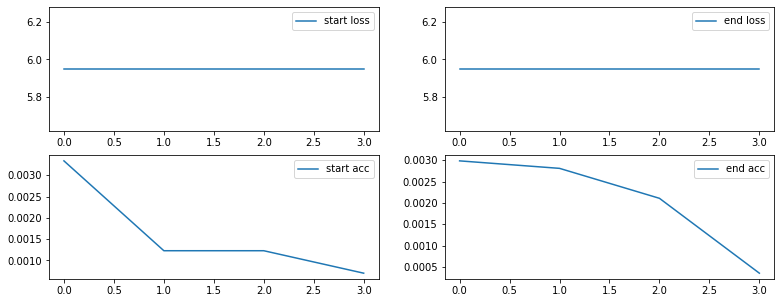

In [37]:
history_plot(history1)

---

**Pre-trained Î™®Îç∏ ÌôúÏö©**

In [27]:
finetune = os.path.join(model_dir, 'bert_pretrain_32000.hdf5') # pre-trained

model2 = BERTModel(config) # Î™®Îç∏ ÏÉùÏÑ±

x = np.random.randint(0, len(vocab), (4, 10))
s = np.random.randint(0, 2, (4, 10))
model2(x, s)

model2.load_weights(finetune, by_name = True) # apply pre-trained 
model2.summary()

Model: "bert_korquad"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (BERT)                  multiple                  29202944  
_________________________________________________________________
dense_36 (Dense)             multiple                  1026      
Total params: 29,203,970
Trainable params: 29,203,970
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2_1, history2_1 = train(model2, 1) # epoch 1

  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 0 evaluate
loss 1.7247, 1.9793
acc 0.5502, 0.5151
Saved best model


In [29]:
result(dev, model2_1)

0
question : ÏûÑÏ¢ÖÏÑùÏù¥ Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùòÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ Îêú ÎÇ†ÏùÄ?
context :
 1989ÎÖÑ 2Ïõî 15Ïùº Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùò(Ìè≠Î†•ÌñâÏúÑÎì±Ï≤òÎ≤åÏóêÍ¥ÄÌïúÎ≤ïÎ•†ÏúÑÎ∞ò)ÏúºÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ÎêòÏóàÎã§. 1989ÎÖÑ 3Ïõî 12Ïùº ÏÑúÏö∏ÏßÄÎ∞©Í≤ÄÏ∞∞Ï≤≠ Í≥µÏïàÎ∂ÄÎäî ÏûÑÏ¢ÖÏÑùÏùò ÏÇ¨Ï†ÑÍµ¨ÏÜçÏòÅÏû•ÏùÑ Î∞úÎ∂ÄÎ∞õÏïòÎã§. Í∞ôÏùÄ Ìï¥ 6Ïõî 30Ïùº ÌèâÏñëÏ∂ïÏ†ÑÏóê ÏûÑÏàòÍ≤ΩÏùÑ ÎåÄÌëúÎ°ú ÌååÍ≤¨ÌïòÏó¨ Íµ≠Í∞ÄÎ≥¥ÏïàÎ≤ïÏúÑÎ∞ò ÌòêÏùòÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÎã§. Í≤ΩÏ∞∞ÏùÄ 12Ïõî 18Ïùº~20Ïùº ÏÇ¨Ïù¥ ÏÑúÏö∏ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóêÏÑú ÏûÑÏ¢ÖÏÑùÏù¥ ÏÑ±Î™Ö Î∞úÌëúÎ•º Ï∂îÏßÑÌïòÍ≥† ÏûàÎã§Îäî Ï≤©Î≥¥Î•º ÏûÖÏàòÌñàÍ≥†, 12Ïõî 18Ïùº Ïò§Ï†Ñ 7Ïãú 40Î∂Ñ Í≤Ω Í∞ÄÏä§Ï¥ùÍ≥º Ï†ÑÏûêÎ¥âÏúºÎ°ú Î¨¥Ïû•Ìïú ÌäπÍ≥µÏ°∞ Î∞è ÎåÄÍ≥µÍ≥º ÏßÅÏõê 12Î™Ö Îì± 22Î™ÖÏùò ÏÇ¨Î≥µ Í≤ΩÏ∞∞ÏùÑ ÏäπÏö©Ï∞® 8ÎåÄÏóê ÎÇòÎàÑÏñ¥ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóê Ìà¨ÏûÖÌñàÎã§. 1989ÎÖÑ 12Ïõî 18Ïùº Ïò§Ï†Ñ 8Ïãú 15Î∂Ñ Í≤Ω ÏÑúÏö∏Ï≤≠ÎüâÎ¶¨Í≤ΩÏ∞∞ÏÑúÎäî Ìò∏ÏúÑ ÌïôÏÉù 5Î™ÖÍ≥º Ìï®Íªò Í≤ΩÌù¨ÎåÄÌïôÍµê ÌïôÏÉùÌöåÍ¥Ä Í±¥Î¨º Í≥ÑÎã®ÏùÑ ÎÇ¥Î†§Ïò§Îäî ÏûÑÏ¢ÖÏÑùÏùÑ

In [30]:
model2_2, history2_2 = train(model2, 1) # epoch 1+1=2

  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 0 evaluate
loss 1.6424, 1.8651
acc 0.5785, 0.5406
Saved best model


In [31]:
result(dev, model2_2)

0
question : ÏûÑÏ¢ÖÏÑùÏù¥ Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùòÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ Îêú ÎÇ†ÏùÄ?
context :
 1989ÎÖÑ 2Ïõî 15Ïùº Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùò(Ìè≠Î†•ÌñâÏúÑÎì±Ï≤òÎ≤åÏóêÍ¥ÄÌïúÎ≤ïÎ•†ÏúÑÎ∞ò)ÏúºÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ÎêòÏóàÎã§. 1989ÎÖÑ 3Ïõî 12Ïùº ÏÑúÏö∏ÏßÄÎ∞©Í≤ÄÏ∞∞Ï≤≠ Í≥µÏïàÎ∂ÄÎäî ÏûÑÏ¢ÖÏÑùÏùò ÏÇ¨Ï†ÑÍµ¨ÏÜçÏòÅÏû•ÏùÑ Î∞úÎ∂ÄÎ∞õÏïòÎã§. Í∞ôÏùÄ Ìï¥ 6Ïõî 30Ïùº ÌèâÏñëÏ∂ïÏ†ÑÏóê ÏûÑÏàòÍ≤ΩÏùÑ ÎåÄÌëúÎ°ú ÌååÍ≤¨ÌïòÏó¨ Íµ≠Í∞ÄÎ≥¥ÏïàÎ≤ïÏúÑÎ∞ò ÌòêÏùòÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÎã§. Í≤ΩÏ∞∞ÏùÄ 12Ïõî 18Ïùº~20Ïùº ÏÇ¨Ïù¥ ÏÑúÏö∏ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóêÏÑú ÏûÑÏ¢ÖÏÑùÏù¥ ÏÑ±Î™Ö Î∞úÌëúÎ•º Ï∂îÏßÑÌïòÍ≥† ÏûàÎã§Îäî Ï≤©Î≥¥Î•º ÏûÖÏàòÌñàÍ≥†, 12Ïõî 18Ïùº Ïò§Ï†Ñ 7Ïãú 40Î∂Ñ Í≤Ω Í∞ÄÏä§Ï¥ùÍ≥º Ï†ÑÏûêÎ¥âÏúºÎ°ú Î¨¥Ïû•Ìïú ÌäπÍ≥µÏ°∞ Î∞è ÎåÄÍ≥µÍ≥º ÏßÅÏõê 12Î™Ö Îì± 22Î™ÖÏùò ÏÇ¨Î≥µ Í≤ΩÏ∞∞ÏùÑ ÏäπÏö©Ï∞® 8ÎåÄÏóê ÎÇòÎàÑÏñ¥ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóê Ìà¨ÏûÖÌñàÎã§. 1989ÎÖÑ 12Ïõî 18Ïùº Ïò§Ï†Ñ 8Ïãú 15Î∂Ñ Í≤Ω ÏÑúÏö∏Ï≤≠ÎüâÎ¶¨Í≤ΩÏ∞∞ÏÑúÎäî Ìò∏ÏúÑ ÌïôÏÉù 5Î™ÖÍ≥º Ìï®Íªò Í≤ΩÌù¨ÎåÄÌïôÍµê ÌïôÏÉùÌöåÍ¥Ä Í±¥Î¨º Í≥ÑÎã®ÏùÑ ÎÇ¥Î†§Ïò§Îäî ÏûÑÏ¢ÖÏÑùÏùÑ

In [32]:
model2_3, history2_3 = train(model2, 1) # epoch 2+1=3

  0%|          | 0/1875 [00:00<?, ?it/s]

epoch 0 evaluate
loss 1.8463, 2.1241
acc 0.5634, 0.5137
Saved best model


In [33]:
result(dev, model2_3)

0
question : ÏûÑÏ¢ÖÏÑùÏù¥ Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùòÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ Îêú ÎÇ†ÏùÄ?
context :
 1989ÎÖÑ 2Ïõî 15Ïùº Ïó¨ÏùòÎèÑ ÎÜçÎØº Ìè≠Î†• ÏãúÏúÑÎ•º Ï£ºÎèÑÌïú ÌòêÏùò(Ìè≠Î†•ÌñâÏúÑÎì±Ï≤òÎ≤åÏóêÍ¥ÄÌïúÎ≤ïÎ•†ÏúÑÎ∞ò)ÏúºÎ°ú ÏßÄÎ™ÖÏàòÎ∞∞ÎêòÏóàÎã§. 1989ÎÖÑ 3Ïõî 12Ïùº ÏÑúÏö∏ÏßÄÎ∞©Í≤ÄÏ∞∞Ï≤≠ Í≥µÏïàÎ∂ÄÎäî ÏûÑÏ¢ÖÏÑùÏùò ÏÇ¨Ï†ÑÍµ¨ÏÜçÏòÅÏû•ÏùÑ Î∞úÎ∂ÄÎ∞õÏïòÎã§. Í∞ôÏùÄ Ìï¥ 6Ïõî 30Ïùº ÌèâÏñëÏ∂ïÏ†ÑÏóê ÏûÑÏàòÍ≤ΩÏùÑ ÎåÄÌëúÎ°ú ÌååÍ≤¨ÌïòÏó¨ Íµ≠Í∞ÄÎ≥¥ÏïàÎ≤ïÏúÑÎ∞ò ÌòêÏùòÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÎã§. Í≤ΩÏ∞∞ÏùÄ 12Ïõî 18Ïùº~20Ïùº ÏÇ¨Ïù¥ ÏÑúÏö∏ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóêÏÑú ÏûÑÏ¢ÖÏÑùÏù¥ ÏÑ±Î™Ö Î∞úÌëúÎ•º Ï∂îÏßÑÌïòÍ≥† ÏûàÎã§Îäî Ï≤©Î≥¥Î•º ÏûÖÏàòÌñàÍ≥†, 12Ïõî 18Ïùº Ïò§Ï†Ñ 7Ïãú 40Î∂Ñ Í≤Ω Í∞ÄÏä§Ï¥ùÍ≥º Ï†ÑÏûêÎ¥âÏúºÎ°ú Î¨¥Ïû•Ìïú ÌäπÍ≥µÏ°∞ Î∞è ÎåÄÍ≥µÍ≥º ÏßÅÏõê 12Î™Ö Îì± 22Î™ÖÏùò ÏÇ¨Î≥µ Í≤ΩÏ∞∞ÏùÑ ÏäπÏö©Ï∞® 8ÎåÄÏóê ÎÇòÎàÑÏñ¥ Í≤ΩÌù¨ÎåÄÌïôÍµêÏóê Ìà¨ÏûÖÌñàÎã§. 1989ÎÖÑ 12Ïõî 18Ïùº Ïò§Ï†Ñ 8Ïãú 15Î∂Ñ Í≤Ω ÏÑúÏö∏Ï≤≠ÎüâÎ¶¨Í≤ΩÏ∞∞ÏÑúÎäî Ìò∏ÏúÑ ÌïôÏÉù 5Î™ÖÍ≥º Ìï®Íªò Í≤ΩÌù¨ÎåÄÌïôÍµê ÌïôÏÉùÌöåÍ¥Ä Í±¥Î¨º Í≥ÑÎã®ÏùÑ ÎÇ¥Î†§Ïò§Îäî ÏûÑÏ¢ÖÏÑùÏùÑ

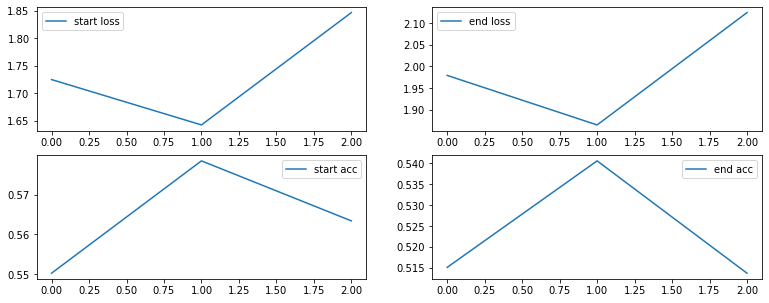

In [35]:
history2 = [[], [], [], []]

history2[0] = history2_1[0] + history2_2[0] + history2_3[0]
history2[1] = history2_1[1] + history2_2[1] + history2_3[1]
history2[2] = history2_1[2] + history2_2[2] + history2_3[2]
history2[3] = history2_1[3] + history2_2[3] + history2_3[3]

history_plot(history2)

---

In [36]:
from IPython.display import Image

**ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∞Ä**

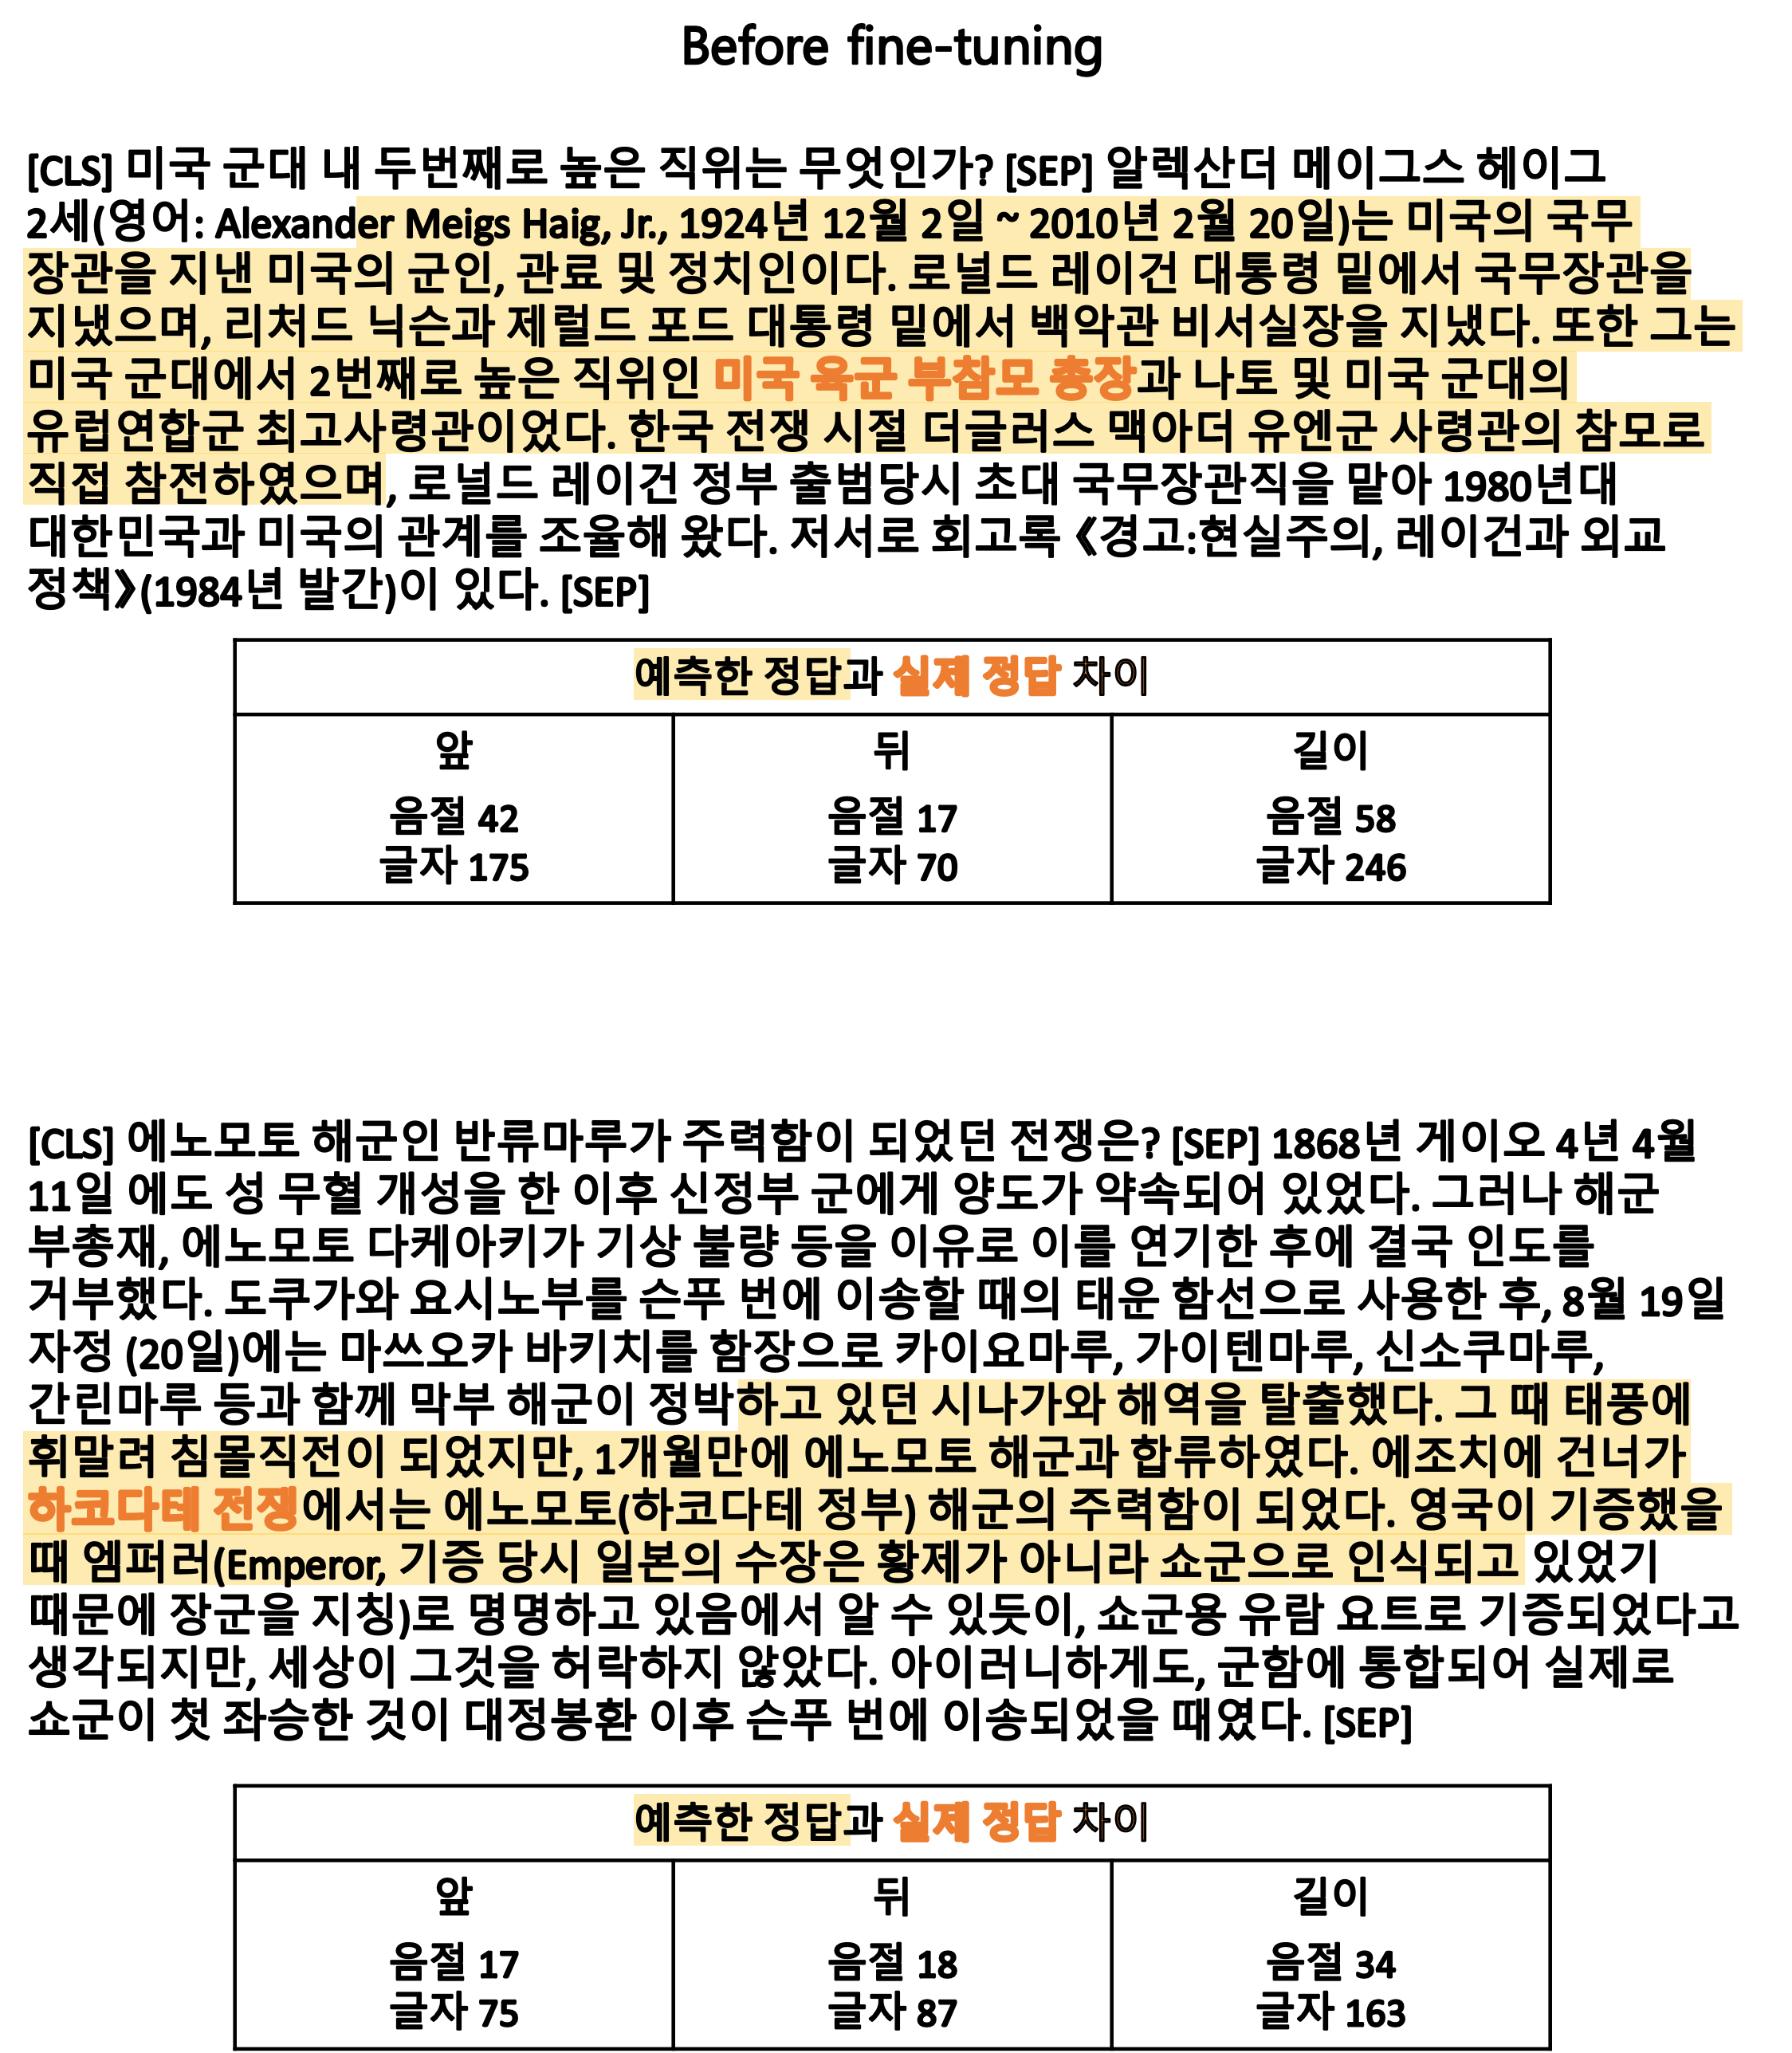

In [46]:
# ÏùºÎ∞ò Î™®Îç∏
Image("before.png", width = 500)

* Ï†ïÎãµÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÍ∏∞Îäî ÌïòÏßÄÎßå Í±∞Ïùò ÎßûÏ∂îÍ≥† ÏûàÏßÄ ÏïäÏäµÎãàÎã§.

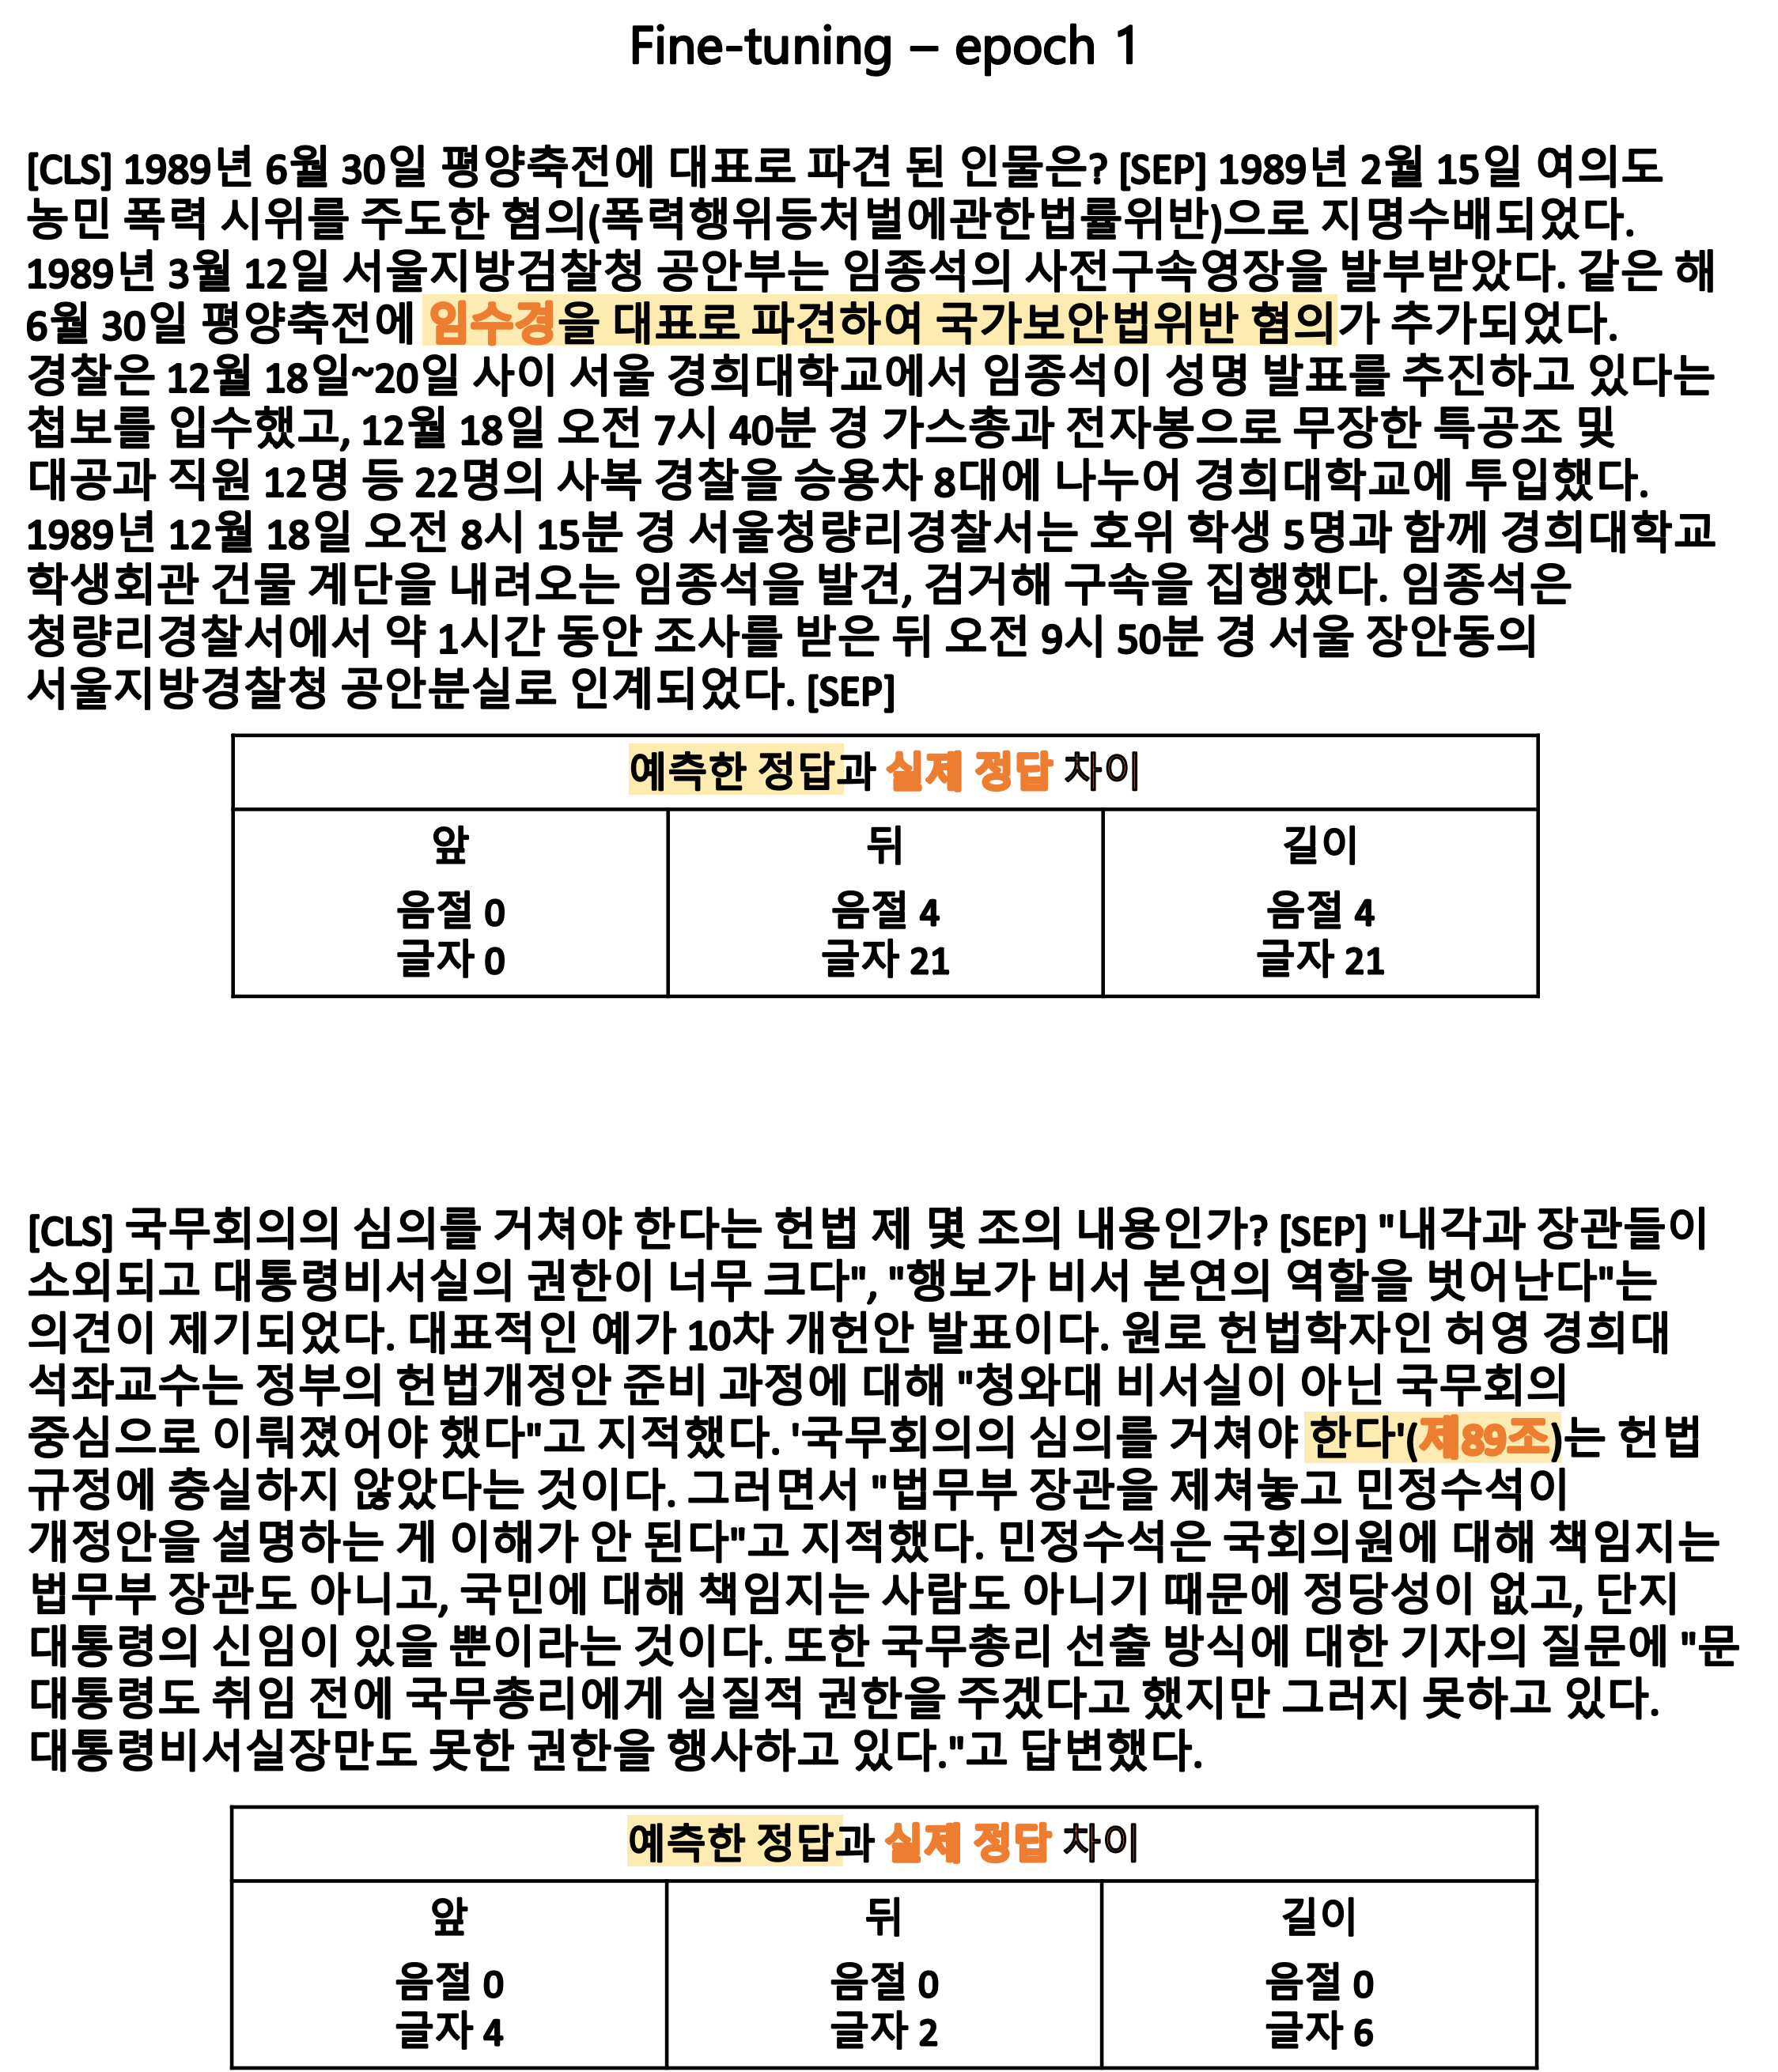

In [47]:
# pre-trained model epoch 1
Image("finetune1.png", width = 500)

* Í±∞Ïùò Ï†ïÎãµÏóê Í∑ºÏ†ëÌï©ÎãàÎã§.

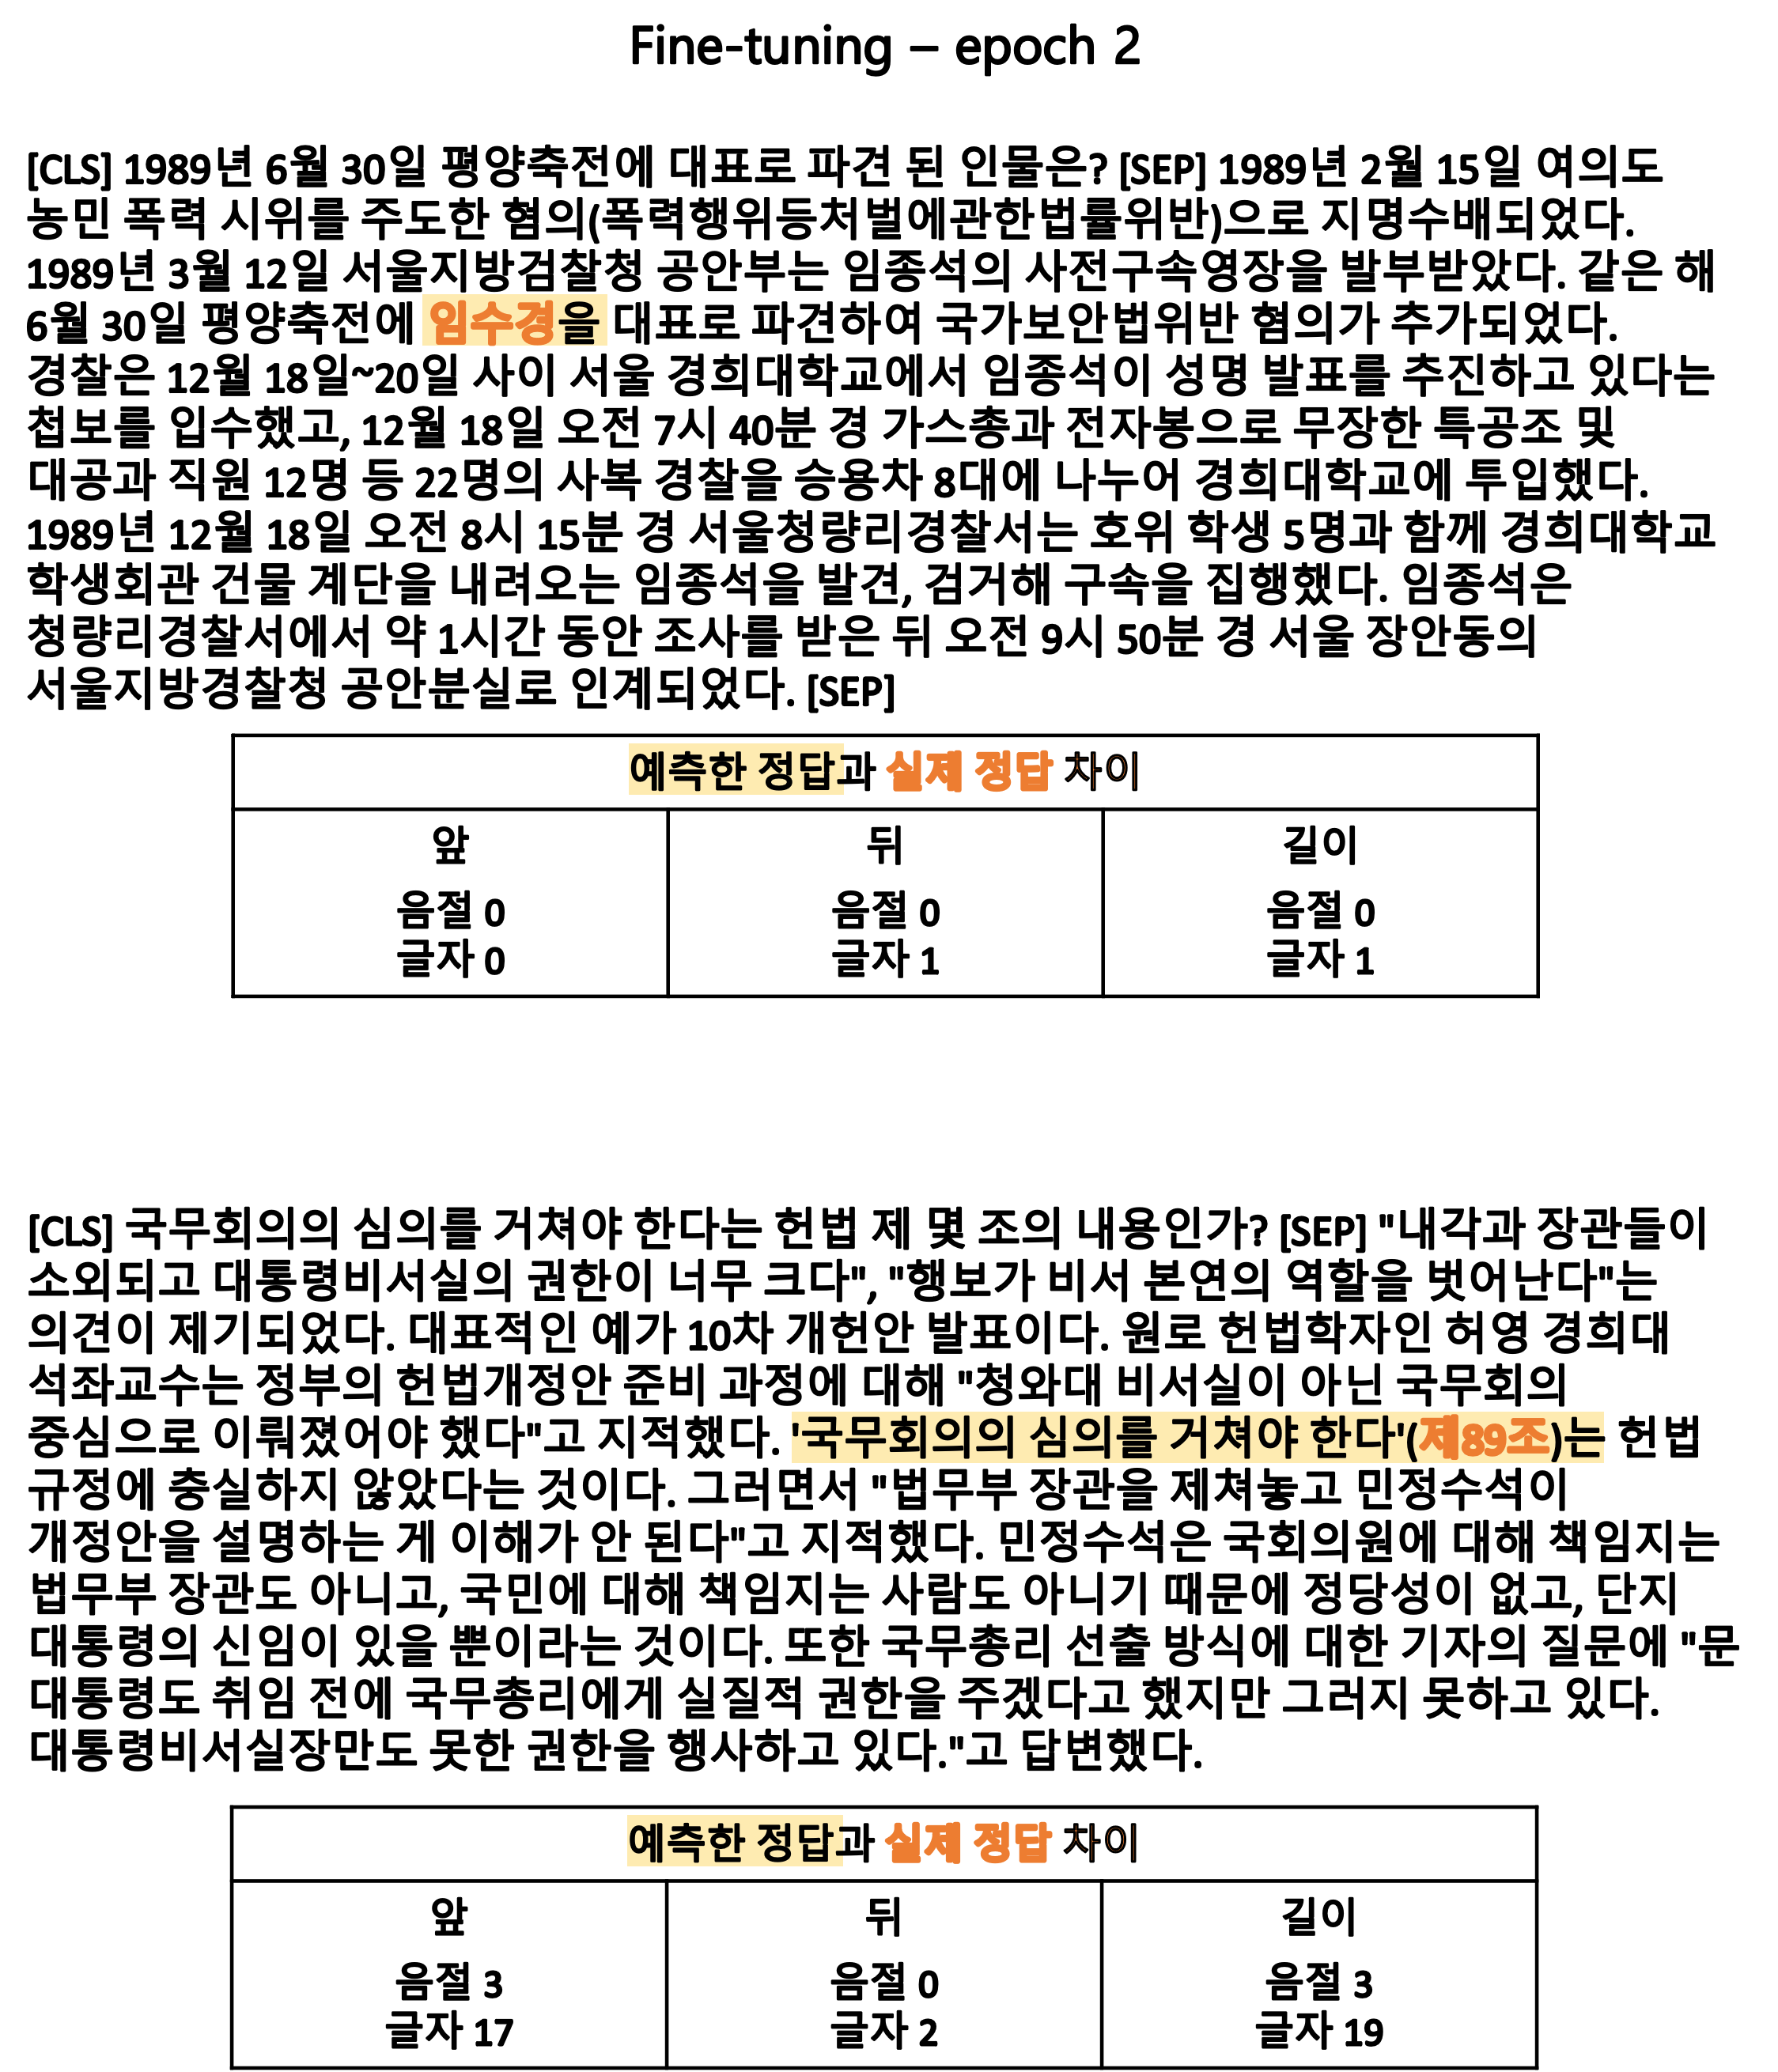

In [48]:
# pre-trained model epoch 2
Image("finetune2.png", width = 500)

* ÏúÑÏôÄ ÎπÑÏä∑ÌïòÍ≤å Ï†ïÎãµÏóê Í∑ºÏ†ëÌï©ÎãàÎã§.

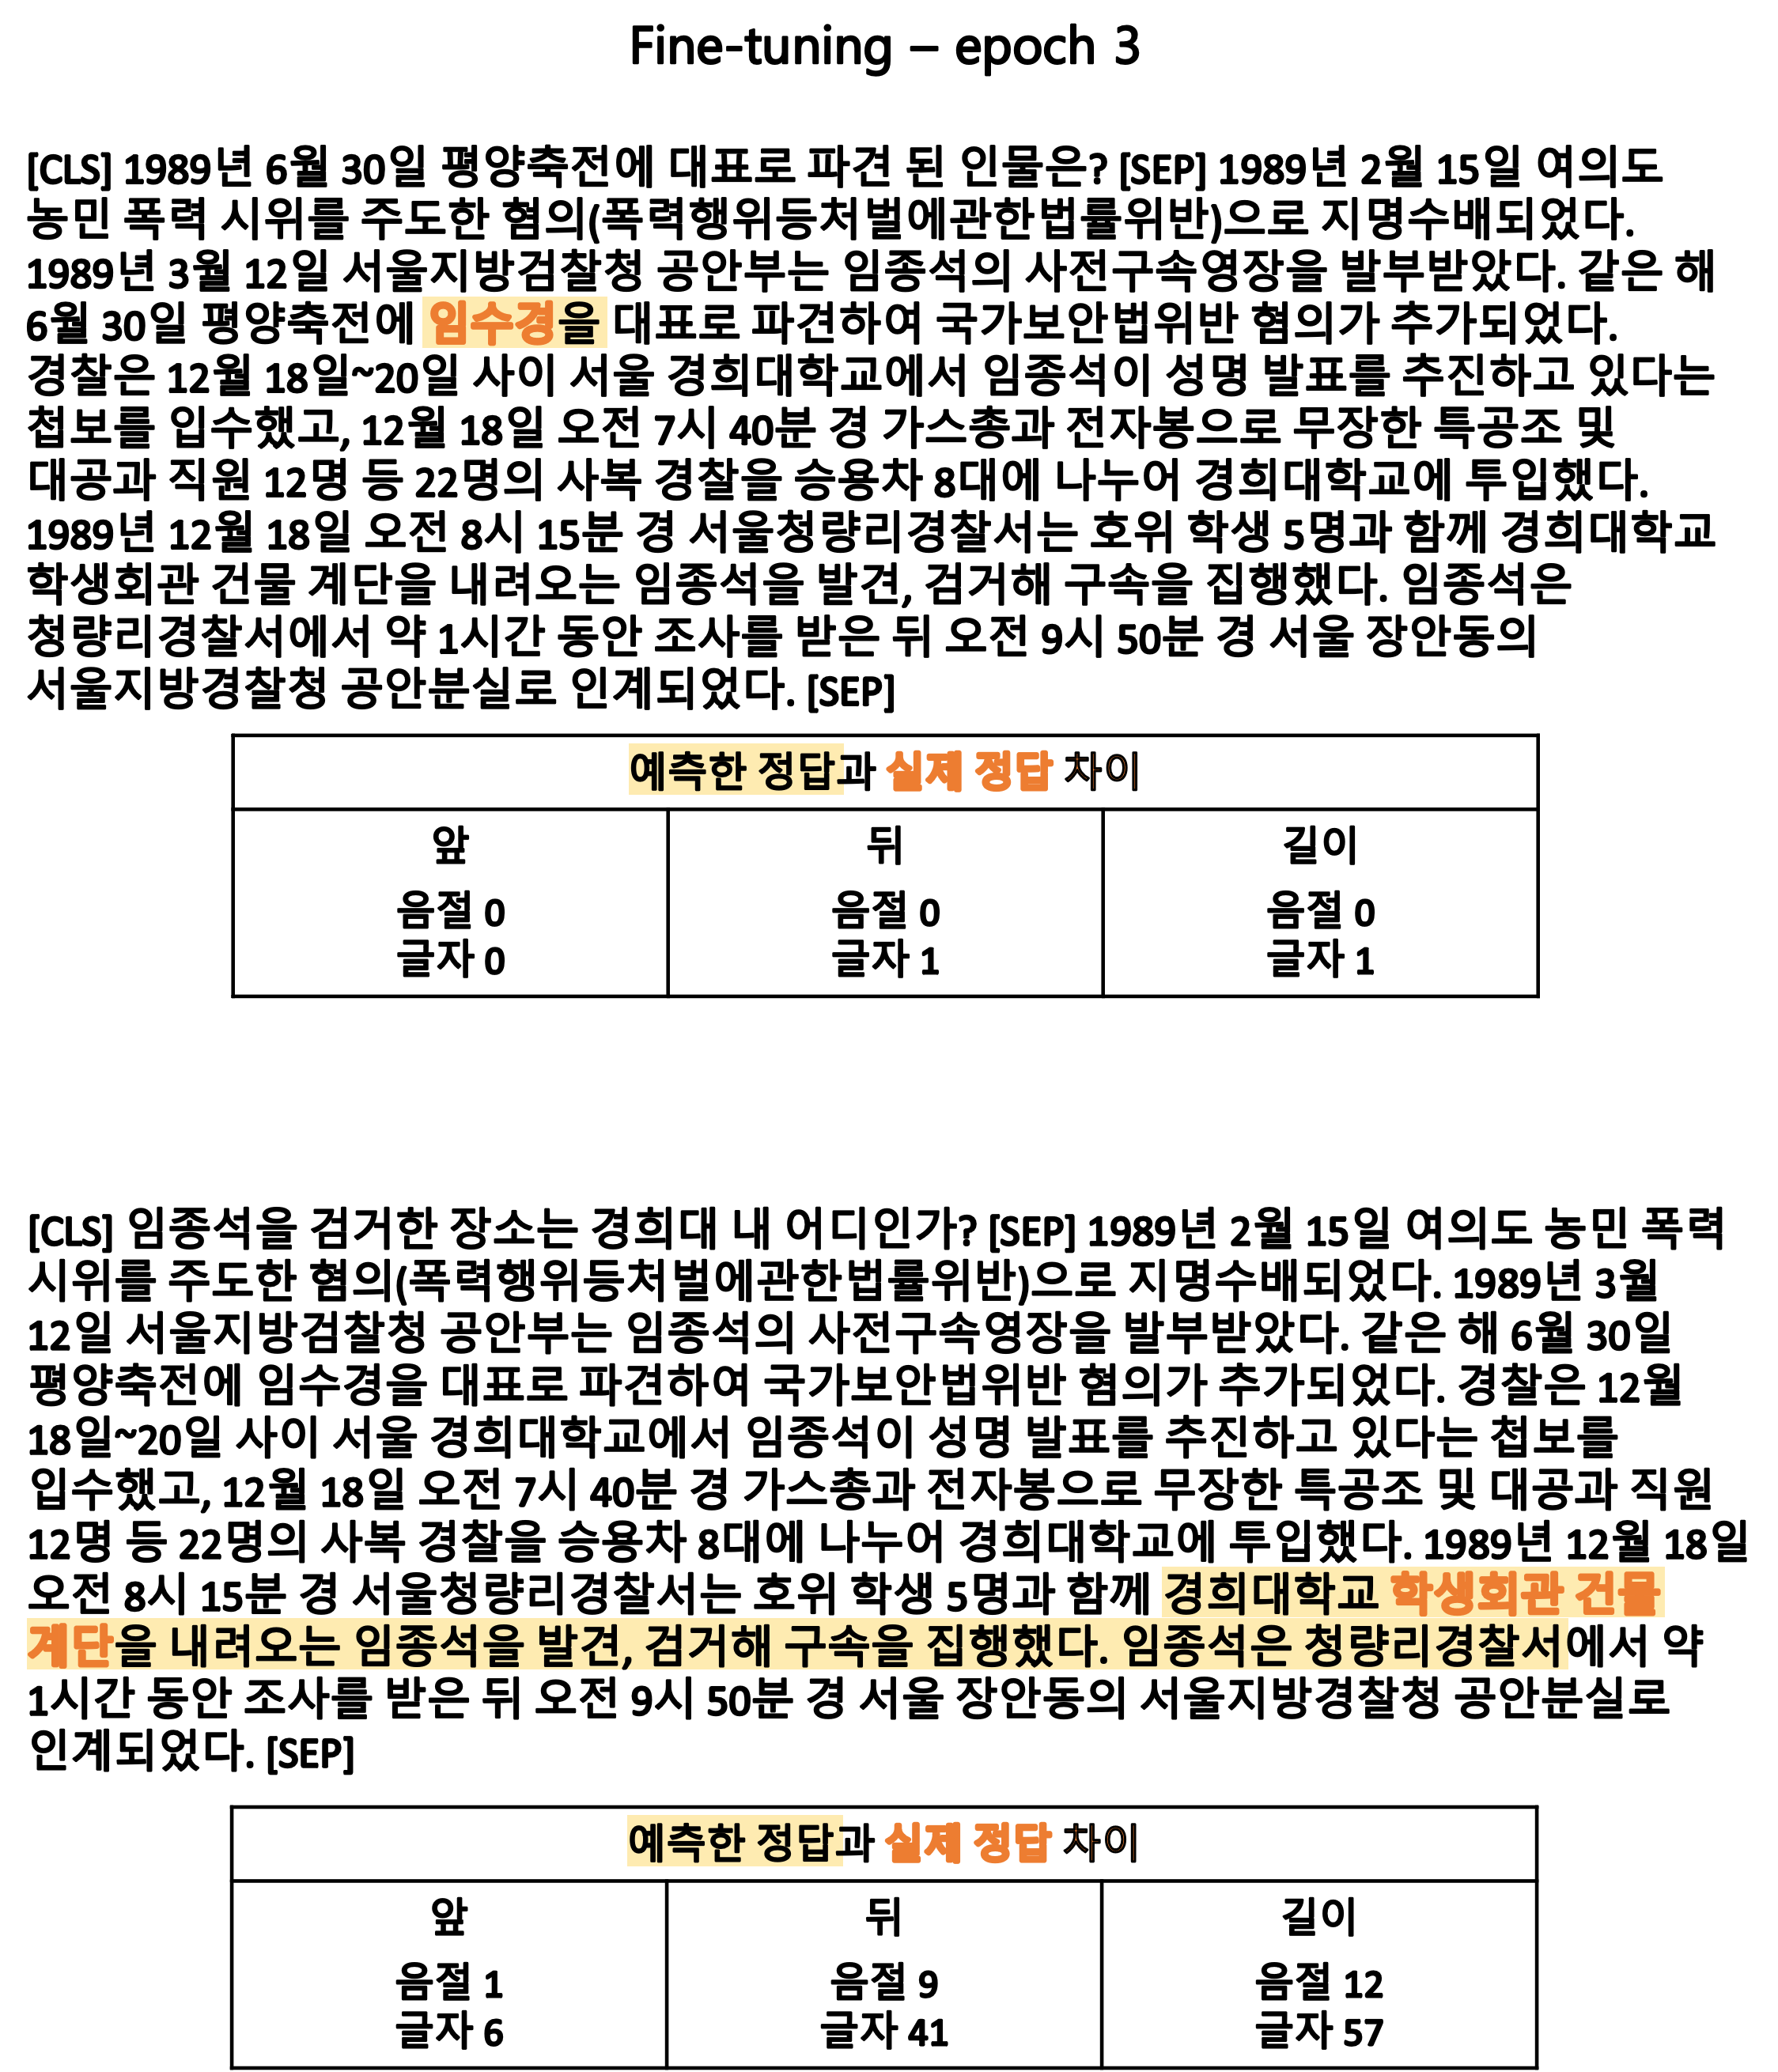

In [49]:
# pre-trained model epoch 3
Image("finetune3.png", width = 500)

* ÏúÑÏôÄ ÎπÑÏä∑ÌïòÍ≤å Ï†ïÎãµÏóê Í∑ºÏ†ëÌï©ÎãàÎã§.

---

**ÏùºÎ∞ò Î™®Îç∏ ÏÑ±Îä•**

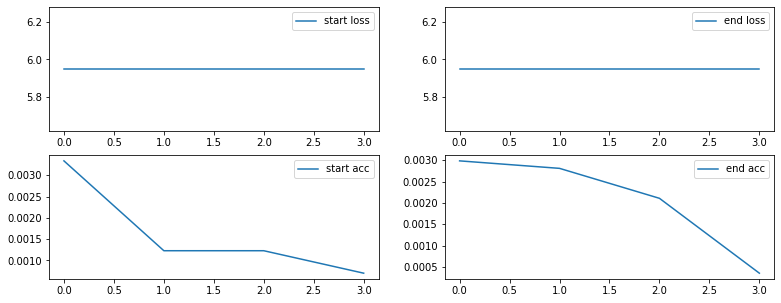

* ÏùºÎ∞ò Î™®Îç∏Ïùò epoch 0Î∂ÄÌÑ∞ 3ÍπåÏßÄ 4ÌöåÏûÖÎãàÎã§.
* ÌäπÏù¥ÌïòÍ≤åÎèÑ epoch 4Ìöå ÎèôÏïà lossÏùò Î≥ÄÌï®Ïù¥ ÏóÜÏäµÎãàÎã§.
* accÎäî ÏµúÏ¥àÎ∂ÄÌÑ∞ Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌï©ÎãàÎã§.

<br/>

**pre-trained model**

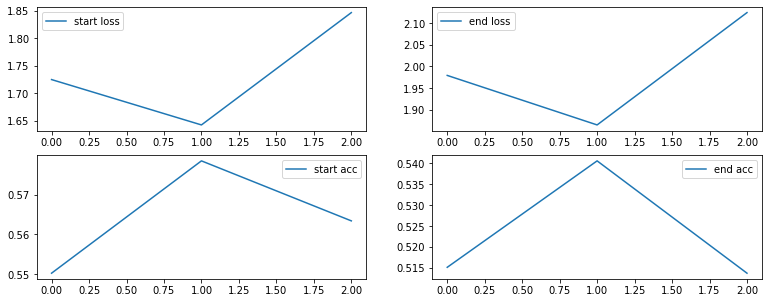

* pre-trained modelÏùò epoch 0Î∂ÄÌÑ∞ 2ÍπåÏßÄ 3ÌöåÏûÖÎãàÎã§.
* pre-trained modelÏùò lossÍ∞Ä Í∞êÏÜåÌñàÎã§Í∞Ä Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
* pre-trained modelÏùò accÍ∞Ä Ï¶ùÍ∞ÄÌñàÎã§Í∞Ä Í∞êÏÜåÌï©ÎãàÎã§.

---

**ÌöåÍ≥†**

* ÌõàÎ†® ÏãúÍ∞ÑÏù¥ Í∏∏Í∏∞ ÎïåÎ¨∏Ïóê Îã§ÏñëÌïú ÏãúÎèÑÎ•º ÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Í≥†,
* GPU Î©îÎ™®Î¶¨ Î∂ÄÏ°±ÏúºÎ°ú Î∞úÏÉùÌïòÎäî ResourceExhaustedError: OOM ÏóêÎü¨Î•º Îã§Ïàò Í≤™ÏóàÏäµÎãàÎã§. üò•